In [140]:
import pandas as pd

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import sklearn
import graphviz
from matplotlib import pyplot as plt

## Trying a model with the cleaned data, using FIRE_SIZE_CLASS as the label.

In [142]:
data = pd.read_pickle('final_dataset_1.pkl')


In [143]:
data.head()


,DISCOVERY_DATETIME,STATE,TIME_TO_CONT,FIRE_YEAR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,FIRE_SIZE_CLASS
0,2,4.0,4.50,2005,9.0,40.036944,-121.005833,1
1,5,4.0,6.75,2004,1.0,38.933056,-120.404444,1
2,5,4.0,1.05,2004,5.0,38.984167,-120.735556,1
3,6,4.0,118.00,2004,1.0,38.559167,-119.913333,1
4,6,4.0,116.00,2004,1.0,38.559167,-119.933056,1


In [144]:
y = data['FIRE_SIZE_CLASS']
X = data.drop(columns=['FIRE_SIZE_CLASS'])

In [145]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: FIRE_SIZE_CLASS, dtype: int64

In [146]:
X.head()

,DISCOVERY_DATETIME,STATE,TIME_TO_CONT,FIRE_YEAR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE
0,2,4.0,4.50,2005,9.0,40.036944,-121.005833
1,5,4.0,6.75,2004,1.0,38.933056,-120.404444
2,5,4.0,1.05,2004,5.0,38.984167,-120.735556
3,6,4.0,118.00,2004,1.0,38.559167,-119.913333
4,6,4.0,116.00,2004,1.0,38.559167,-119.933056


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [148]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print(accuracy_score(y_train, y_train_predict))
print(accuracy_score(y_test, y_test_predict))

0.998142707029603
0.5902474156059015


In [101]:
md = [1, 2, 4,8, 16, 32, 64]
rand_state = [1, 2, 3, 4, 5]

In [102]:
clf = DecisionTreeClassifier(random_state=0)

In [103]:
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = DecisionTreeClassifier(random_state=0, max_depth=i)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)

In [104]:
train_mean = np.mean(train_accuracy,1)
train_std = np.std(train_accuracy, 1)

In [105]:
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

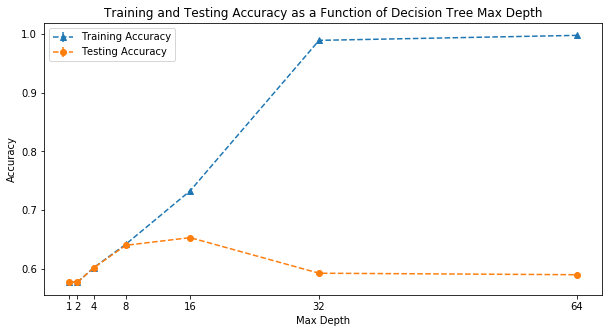

In [107]:
plt.figure(figsize=(10,5))

plt.errorbar(md, train_mean, yerr=train_std, linestyle='dashed', marker='^', label='Training Accuracy')
plt.errorbar(md, test_mean, yerr=test_std, linestyle='dashed', marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy as a Function of Decision Tree Max Depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(md, md)
plt.legend()

## Try again, with data that has outliers removed

In [149]:
data = pd.read_pickle('final_data_without_outliers.pkl')

In [159]:
y = data['FIRE_SIZE_CLASS']
X = data.drop(columns=['FIRE_SIZE_CLASS', 'DISCOVERY_TIME', 'DISCOVERY_DATETIME'])

In [160]:
X.head()

,STAT_CAUSE_CODE,LONGITUDE,LATITUDE,CONT_TIME,FIRE_YEAR,STATE_CODE,HOURS_TO_CONT
0,9.0,-121.005833,40.036944,1730,2005,0,4
1,1.0,-120.404444,38.933056,1530,2004,0,7
2,5.0,-120.735556,38.984167,2024,2004,0,1
3,1.0,-119.913333,38.559167,1400,2004,0,118
4,1.0,-119.933056,38.559167,1200,2004,0,116


In [161]:
md = [1, 2, 4,8, 16, 32, 64]
rand_state = [1, 2, 3, 4, 5]

In [162]:
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = DecisionTreeClassifier(random_state=j, max_depth=i)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)

In [165]:
train_accuracy

[[0.6316459448911876,
  0.6329641211516204,
  0.631161887789199,
  0.6315487984831761,
  0.6310061185487666],
 [0.6387242331714785,
  0.64044606950658,
  0.6385416649219395,
  0.6394645557980494,
  0.6381463795376165],
 [0.6468811815683115,
  0.6475963801238449,
  0.6469414793388014,
  0.6472027696775912,
  0.6463401765719713],
 [0.6544904252165277,
  0.6547215666700724,
  0.6541303135316572,
  0.6550146808321762,
  0.6538020256701008],
 [0.6636322371980296,
  0.6633357731597874,
  0.6630644331925827,
  0.6634010957444848,
  0.6623458847609109],
 [0.6737672874545464,
  0.6735478705674858,
  0.6733887514509151,
  0.6735110219299641,
  0.6734641236640275],
 [0.6868301294559633,
  0.6860127596782108,
  0.6860194594304876,
  0.6863527721062513,
  0.6869122014213525],
 [0.7020636911950181,
  0.701291544745133,
  0.7011022767433174,
  0.7013267184445855,
  0.7021893115502055],
 [0.7198599081798951,
  0.718660652522373,
  0.7182636921999809,
  0.7189202679230935,
  0.7196773399303561],
 [0.74

In [163]:
train_mean = np.mean(train_accuracy,1)
train_std = np.std(train_accuracy, 1)
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

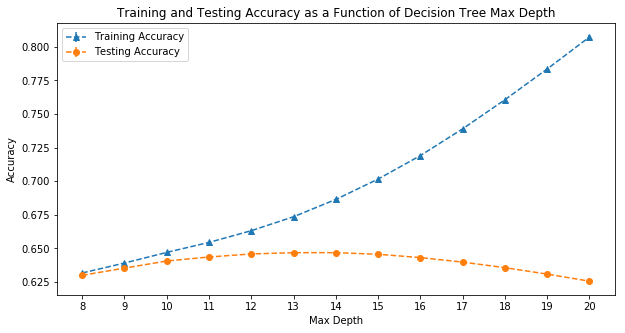

In [164]:
plt.figure(figsize=(10,5))

plt.errorbar(md, train_mean, yerr=train_std, linestyle='dashed', marker='^', label='Training Accuracy')
plt.errorbar(md, test_mean, yerr=test_std, linestyle='dashed', marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy as a Function of Decision Tree Max Depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(md, md)
plt.legend()

## Conclusion, removing outliers has little impact on this specific measure

## Try more detailed look at tree depth

In [ ]:
md = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
rand_state = [1, 2, 3, 4, 5]

In [ ]:
import numpy as np

train_accuracy = []
test_accuracy = []

for i in md:
    ta = []
    tsa = []
    for j in rand_state:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=j)
        clf = DecisionTreeClassifier(random_state=j, max_depth=i)
        clf = clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        ta.append((accuracy_score(y_train, y_train_predict)))
        tsa.append((accuracy_score(y_test, y_test_predict)))
    train_accuracy.append(ta)
    test_accuracy.append(tsa)

In [ ]:
train_mean = np.mean(train_accuracy,1)
train_std = np.std(train_accuracy, 1)
test_mean = np.mean(test_accuracy, 1)
test_std = np.std(test_accuracy, 1)

In [ ]:
plt.figure(figsize=(10,5))

plt.errorbar(md, train_mean, yerr=train_std, linestyle='dashed', marker='^', label='Training Accuracy')
plt.errorbar(md, test_mean, yerr=test_std, linestyle='dashed', marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy as a Function of Decision Tree Max Depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.xticks(md, md)
plt.legend()